In [1]:
from PIL import Image
import numpy as np
import random
import os
import matplotlib.pyplot as plt

In [ ]:
def create_dice1_img_YOLO(num_img=1000):
    for idx_dice in range(1, 7):
        # 読み込み
        image_path = f'./dice_samples/sample_dice1_{idx_dice}.png'
        original_image = Image.open(image_path).convert('RGBA')

        # ダウンスケーリング
        downscaled_size = (700, 700)
        downscaled_image = original_image.resize(downscaled_size)
        for idx_img in range(num_img):
            # 背景画像生成
            background_size = (2000, 2000)
            background = Image.new("RGB", background_size, (0, 0, 0))

            # ランダムな角度で画像を回転
            random_angle = random.randint(0, 360)
            rotated_image = downscaled_image.rotate(random_angle, expand=True)

            # 回転後の画像サイズを取得
            rotated_size = rotated_image.size

            # 回転後の画像が背景内に収まるように座標を制限する
            max_x_rotated = background_size[0] - rotated_size[0]
            max_y_rotated = background_size[1] - rotated_size[1]

            # 座標が負にならないようにする
            max_x_rotated = max(max_x_rotated, 0)
            max_y_rotated = max(max_y_rotated, 0)

            # 回転後の画像を配置するランダムな位置を決定
            random_x_rotated = random.randint(0, max_x_rotated)
            random_y_rotated = random.randint(0, max_y_rotated)

            # 新しい黒い背景画像を生成（前の画像は破棄）
            background_rotated = Image.new("RGB", background_size, (0, 0, 0))

            # 回転した画像を背景に合成
            background_rotated.paste(rotated_image, (random_x_rotated, random_y_rotated))

            # 合成された画像をグレースケールに変換
            grayscale_image_rotated = background_rotated.convert("L")

            bbox_center_x = random_x_rotated + rotated_size[0] / 2
            bbox_center_y = random_y_rotated + rotated_size[1] / 2
            rel_center_x = bbox_center_x / background_size[0]
            rel_center_y = bbox_center_y / background_size[1]
            rel_width = rotated_size[0] / background_size[0]
            rel_height = rotated_size[1] / background_size[1]

            # アノテーションのフォーマットと保存
            annotation = f"{idx_dice-1} {rel_center_x} {rel_center_y} {rel_width} {rel_height}\n" 
            
            if idx_img % 10 == 0:
                folder = "test"
            elif idx_img % 10 == 1:
                folder = "valid"
            else:
                folder = "train"

            # グレースケール画像のパス
            grayscale_image_rotated_high = grayscale_image_rotated.resize((80, 80))
            grayscale_image_high_path = f'./output/original_set/{folder}/images/1{num_img * (idx_dice - 1)+idx_img + 1}.png'
            grayscale_image_rotated.save(grayscale_image_high_path)
            annotation_path = f'./output/original_set/{folder}/labels/1{num_img * (idx_dice - 1)+idx_img + 1}.txt'
            with open(annotation_path, 'w') as file:
                file.write(annotation)   

            grayscale_image_rotated_low = grayscale_image_rotated.resize((20, 20))
            grayscale_image_low_path = f'./output/original_set/{folder}/images/2{num_img * (idx_dice - 1)+idx_img + 1}.png'
            grayscale_image_rotated_low.save(grayscale_image_low_path)
            annotation_path = f'./output/original_set/{folder}/labels/2{num_img * (idx_dice - 1)+idx_img + 1}.txt'
            with open(annotation_path, 'w') as file:
                file.write(annotation)   

            grayscale_image_rotated_upsize = grayscale_image_rotated.resize((20, 20)).resize((80, 80))
            grayscale_image_upsize_path = f'./output/original_set/{folder}/images/3{num_img * (idx_dice - 1)+idx_img + 1}.png'
            grayscale_image_rotated_upsize.save(grayscale_image_upsize_path)
            annotation_path = f'./output/original_set/{folder}/labels/3{num_img * (idx_dice - 1)+idx_img + 1}.txt'
            with open(annotation_path, 'w') as file:
                file.write(annotation)   

            noisy_image_high = add_random_noise(grayscale_image_rotated_high)
            noisy_image_high_path = f'./output/original_set/{folder}/images/4{num_img * (idx_dice - 1)+idx_img + 1}.png'
            noisy_image_high.save(noisy_image_high_path)
            annotation_path = f'./output/original_set/{folder}/labels/4{num_img * (idx_dice - 1)+idx_img + 1}.txt'
            with open(annotation_path, 'w') as file:
                file.write(annotation)   

            noisy_image_low = add_random_noise(grayscale_image_rotated_low)
            noisy_image_low_path = f'./output/original_set/{folder}/images/5{num_img * (idx_dice - 1)+idx_img + 1}.png'
            noisy_image_low.save(noisy_image_low_path)
            annotation_path = f'./output/original_set/{folder}/labels/5{num_img * (idx_dice - 1)+idx_img + 1}.txt'
            with open(annotation_path, 'w') as file:
                file.write(annotation)   

            grayscale_image_rotated_upsize = noisy_image_low.resize((80, 80))
            grayscale_image_upsize_path = f'./output/original_set/{folder}/images/6{num_img * (idx_dice - 1)+idx_img + 1}.png'
            grayscale_image_rotated_upsize.save(grayscale_image_upsize_path)
            annotation_path = f'./output/original_set/{folder}/labels/6{num_img * (idx_dice - 1)+idx_img + 1}.txt'
            with open(annotation_path, 'w') as file:
                file.write(annotation)   

In [10]:
def main(num_img=1000):
    for f1 in ["train", "test", "valid"]:
        for f2 in ["images", "labels"]:
            folder_path = f'/home/imonalc/data_competition/dice/make_dice_img/output/original_set/{f1}/{f2}'
            del_all_files(folder_path)
    create_dice1_img_YOLO(num_img)

In [3]:
if __name__ == '__main__':
    main(10000)

In [4]:
# python scripts/generate_meta_info_pairdata.py --input ../make_dice_img/output/high_resolution/dice1_img ../make_dice_img/output/low_resolution/dice1_img --meta_info datasets/DF2K/meta_info/meta_info_DIV2K_sub_pair.txt
# make_dice_img/output/dice1_img zl real-ESRGAN/datasets/DF2K niido
# train

In [ ]:
for idx_dice in range(1, 7):
    image_path = f'./dice_samples/sample_dice1_{idx_dice}.png'
    original_image = Image.open(image_path).convert('RGBA')
    # ダウンスケーリング
    downscaled_size = (700, 700)
    downscaled_image = original_image.resize(downscaled_size)

    # 背景画像生成
    background_size = (2000, 2000)
    background = Image.new("RGB", background_size, (0, 0, 0))
    # ランダムな角度で画像を回転
    random_angle = random.randint(0, 360)
    rotated_image = downscaled_image.rotate(random_angle, expand=True)
    # 回転後の画像サイズを取得
    rotated_size = rotated_image.size
    # 回転後の画像が背景内に収まるように座標を制限する
    max_x_rotated = background_size[0] - rotated_size[0]
    max_y_rotated = background_size[1] - rotated_size[1]
    # 座標が負にならないようにする
    max_x_rotated = max(max_x_rotated, 0)
    max_y_rotated = max(max_y_rotated, 0)
    # 回転後の画像を配置するランダムな位置を決定
    random_x_rotated = random.randint(0, max_x_rotated)
    random_y_rotated = random.randint(0, max_y_rotated)
    # 新しい黒い背景画像を生成（前の画像は破棄）
    background_rotated = Image.new("RGB", background_size, (0, 0, 0))
    # 回転した画像を背景に合成
    background_rotated.paste(rotated_image, (random_x_rotated, random_y_rotated))
    # 合成された画像をグレースケールに変換
    grayscale_image_rotated = background_rotated.convert("L")


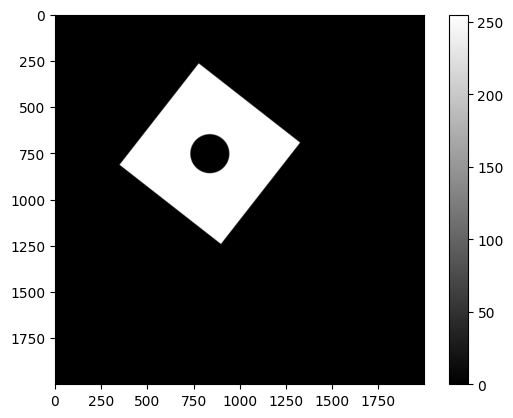

In [3]:
image_path = f'./dice_samples/sample_dice1_1.png'
original_image = Image.open(image_path).convert('RGBA')
# ダウンスケーリング
downscaled_size = (700, 700)
downscaled_image = original_image.resize(downscaled_size)
# 背景画像生成
background_size = (2000, 2000)
background = Image.new("RGB", background_size, (0, 0, 0))
# ランダムな角度で画像を回転
random_angle = random.randint(0, 360)
rotated_image = downscaled_image.rotate(random_angle, expand=True)
# 回転後の画像サイズを取得
rotated_size = rotated_image.size
# 回転後の画像が背景内に収まるように座標を制限する
max_x_rotated = background_size[0] - rotated_size[0]
max_y_rotated = background_size[1] - rotated_size[1]
# 座標が負にならないようにする
max_x_rotated = max(max_x_rotated, 0)
max_y_rotated = max(max_y_rotated, 0)
# 回転後の画像を配置するランダムな位置を決定
random_x_rotated = random.randint(0, max_x_rotated)
random_y_rotated = random.randint(0, max_y_rotated)
# 新しい黒い背景画像を生成（前の画像は破棄）
background_rotated = Image.new("RGB", background_size, (0, 0, 0))
# 回転した画像を背景に合成
background_rotated.paste(rotated_image, (random_x_rotated, random_y_rotated))
# 合成された画像をグレースケールに変換
grayscale_image_rotated = background_rotated.convert("L")

plt.imshow(grayscale_image_rotated, cmap="gray")
plt.colorbar()
plt.show()

In [22]:
import random
from PIL import Image

def get_non_transparent_area(image):
    """非透明領域（バウンディングボックス）を返す関数"""
    bbox = image.split()[-1].getbbox()
    return bbox if bbox else (0, 0, 0, 0)

def check_overlap(bbox1, bbox2):
    """二つのバウンディングボックスが重ならないかを確認する関数"""
    return not (bbox1[2] < bbox2[0] or bbox1[0] > bbox2[2] or
                bbox1[3] < bbox2[1] or bbox1[1] > bbox2[3])

def place_image(background, image, non_transparent_area):
    """画像を重ならない位置に配置する関数"""
    rec_times = 0
    while True:
        rotated_size = image.size
        max_x = background.size[0] - rotated_size[0]
        max_y = background.size[1] - rotated_size[1]
        random_x = random.randint(0, max(max_x, 0))
        random_y = random.randint(0, max(max_y, 0))

        # 新しいバウンディングボックスの計算
        new_bbox = (random_x, random_y, random_x + rotated_size[0], random_y + rotated_size[1])

        # 非透明領域が重ならない場合のみ配置
        if not check_overlap(non_transparent_area, new_bbox):
            background.paste(image, (random_x, random_y), image)
            return new_bbox, True  # 更新された非透明領域のバウンディングボックスを返す
        rec_times += 1
        if rec_times > 100:
            return (0, 0, 0, 0), False


def place_image2(background, image, non_transparent_area, new_bbox):
    # 非透明領域が重ならない場合のみ配置
    new_bbox = (random_x, random_y, random_x + rotated_size[0], random_y + rotated_size[1])
    if not check_overlap(non_transparent_area, new_bbox2):
        background.paste(image, (new_bbox[0], new_bbox[1]), image)
        return new_bbox, True  # 更新された非透明領域のバウンディングボックスを返す
    return (0, 0, 0, 0), False

In [37]:
def create_dice2_img_YOLO(num_img=1000):
    background_size = (2000, 2000)
    downscaled_size = (700, 700)
    for idx_dice1 in range(1, 7):
        image1_path = f'./dice_samples/sample_dice1_{idx_dice1}.png'
        original_image1 = Image.open(image1_path).convert('RGBA')
        downscaled_image1 = original_image1.resize(downscaled_size)
        for idx_dice2 in range(idx_dice1, 7):
            image2_path = f'./dice_samples/sample_dice1_{idx_dice2}.png'
            original_image2 = Image.open(image2_path).convert('RGBA')
            downscaled_image2 = original_image2.resize(downscaled_size)
            for idx_img in range(num_img):

                non_transparent_area = (0, 0, 0, 0)
                background = Image.new("RGB", background_size, (0, 0, 0))
                random_angle1 = random.randint(0, 360)
                rotated_image1 = downscaled_image1.rotate(random_angle1, expand=True)
                # 回転後の画像サイズを取得
                rotated_size1 = rotated_image1.size
                # 回転後の画像が背景内に収まるように座標を制限する
                max_x_rotated1 = background_size[0] - rotated_size1[0]
                max_y_rotated1 = background_size[1] - rotated_size1[1]
                # 座標が負にならないようにする
                max_x_rotated1 = max(max_x_rotated1, 0)
                max_y_rotated1 = max(max_y_rotated1, 0)
                # 回転後の画像を配置するランダムな位置を決定
                random_x_rotated1 = random.randint(0, max_x_rotated1)
                random_y_rotated1 = random.randint(0, max_y_rotated1)

                bbox_center_x1 = random_x_rotated1 + rotated_size1[0] / 2
                bbox_center_y1 = random_y_rotated1 + rotated_size1[1] / 2
                rel_center_x1 = bbox_center_x1 / background_size[0]
                rel_center_y1 = bbox_center_y1 / background_size[1]
                rel_width1 = rotated_size1[0] / background_size[0]
                rel_height1 = rotated_size1[1] / background_size[1]
                # アノテーションのフォーマットと保存
                annotation = f"{idx_dice1-1} {rel_center_x1} {rel_center_y1} {rel_width1} {rel_height1}\n" 

                # 新しい画像を重ならない位置に配置
                non_transparent_area, has_1dices = place_image(background, rotated_image1, non_transparent_area)
                
                has_2dices = True
                rec_idx = 0
                while True:
                    rec_idx += 1
                    random_angle2 = random.randint(0, 360)
                    rotated_image2 = downscaled_image2.rotate(random_angle2, expand=True)
                    # 回転後の画像サイズを取得
                    rotated_size2 = rotated_image2.size
                    # 回転後の画像が背景内に収まるように座標を制限する
                    max_x_rotated2 = background_size[0] - rotated_size2[0]
                    max_y_rotated2 = background_size[1] - rotated_size2[1]
                    # 座標が負にならないようにする
                    max_x_rotated2 = max(max_x_rotated2, 0)
                    max_y_rotated2 = max(max_y_rotated2, 0)
                    # 回転後の画像を配置するランダムな位置を決定
                    random_x_rotated2 = random.randint(0, max_x_rotated2)
                    random_y_rotated2 = random.randint(0, max_y_rotated2)

                    bbox_center_x2 = random_x_rotated2 + rotated_size2[0] / 2
                    bbox_center_y2 = random_y_rotated2 + rotated_size2[1] / 2
                    rel_center_x2 = bbox_center_x2 / background_size[0]
                    rel_center_y2 = bbox_center_y2 / background_size[1]
                    rel_width2 = rotated_size2[0] / background_size[0]
                    rel_height2 = rotated_size2[1] / background_size[1]
                    # アノテーションのフォーマットと保存
                    
                    non_transparent_area, is_good_locate = place_image(background, rotated_image2, non_transparent_area)
                    if is_good_locate:
                        annotation += f"{idx_dice2-1} {rel_center_x2} {rel_center_y2} {rel_width2} {rel_height2}\n"
                        break

                    if rec_idx > 100:
                        has_2dices = False
                        break
                print(rec_idx)
                if not has_2dices:
                    continue

                if idx_img % 10 == 0:
                    folder = "test"
                elif idx_img % 10 == 1:
                    folder = "valid"
                else:
                    folder = "train"

                # グレースケール画像のパス
                grayscale_image_rotated_high = background.resize((80, 80))
                grayscale_image_high_path = f'./output/original_set/{folder}/images/{idx_dice1}{idx_dice2}{idx_img+1}.png'
                grayscale_image_rotated_high.save(grayscale_image_high_path)
                annotation_path = f'./output/original_set/{folder}/labels/{idx_dice1}{idx_dice2}{idx_img+1}.txt'
                with open(annotation_path, 'w') as file:
                    file.write(annotation)


In [38]:
create_dice2_img_YOLO(10)

2
2
1
1
2
1
1
1
1
2
1
1
2
2
2
1
1
1
2
1
1
1
1
1
1
1
1
2
2
1
1
1
2
2
2
1
1
1
2
1
1
1
1
1
2
1
2
2
2
1
2
1
1
2
1
2
2
2
2
1
2
1
1
2
2
2
2
1
2
2
1
1
2
2
1
1
1
2
2
1
2
2
1
2
1
1
1
2
1
1
2
1
2
1
1
1
2
1
1
1
1
1
2
1
1
1
2
2
1
1
2
2
2
1
2
2
1
1
2
1
1
2
1
1
1
2
1
2
2
2
1
2
1
2
1
1
1
1
2
2
2
1
2
1
2
1
2
2
1
2
1
1
1
2
1
1
2
2
2
1
2
2
2
2
1
1
2
1
2
1
1
2
2
1
2
1
2
1
2
1
2
2
2
1
1
2
1
2
2
1
1
1
2
2
2
1
2
1
2
2
2
2
2
1
1
1
1
1
2
1


In [ ]:

# 初期設定
background_size = (2000, 2000)
downscaled_size = (700, 700)
non_transparent_area = (0, 0, 0, 0)  # 非透明領域がないことを示す初期値

for idx_dice in range(1, 7):
    background = Image.new("RGB", background_size, (0, 0, 0))
    annotation_dict = {}

    for dice_number in range(1, 3):  # 2つのサイコロ画像
        image_path = f'./dice_samples/sample_dice{1}_{idx_dice}.png'
        original_image = Image.open(image_path).convert('RGBA')
        downscaled_image = original_image.resize(downscaled_size)

        random_angle = random.randint(0, 360)
        rotated_image = downscaled_image.rotate(random_angle, expand=True)
        # 回転後の画像サイズを取得
        rotated_size = rotated_image.size
        # 回転後の画像が背景内に収まるように座標を制限する
        max_x_rotated = background_size[0] - rotated_size[0]
        max_y_rotated = background_size[1] - rotated_size[1]
        # 座標が負にならないようにする
        max_x_rotated = max(max_x_rotated, 0)
        max_y_rotated = max(max_y_rotated, 0)
        # 回転後の画像を配置するランダムな位置を決定
        random_x_rotated = random.randint(0, max_x_rotated)
        random_y_rotated = random.randint(0, max_y_rotated)
        # 新しい黒い背景画像を生成（前の画像は破棄）
        background_rotated = Image.new("RGB", background_size, (0, 0, 0))

        bbox_center_x = random_x_rotated + rotated_size[0] / 2
        bbox_center_y = random_y_rotated + rotated_size[1] / 2
        rel_center_x = bbox_center_x / background_size[0]
        rel_center_y = bbox_center_y / background_size[1]
        rel_width = rotated_size[0] / background_size[0]
        rel_height = rotated_size[1] / background_size[1]
        # アノテーションのフォーマットと保存
        annotation = f"{idx_dice-1} {rel_center_x} {rel_center_y} {rel_width} {rel_height}\n" 

        # 新しい画像を重ならない位置に配置
        non_transparent_area, has_2dices = place_image(background, rotated_image, non_transparent_area)
        if not has_2dices:
            continue
        print(non_transparent_area)

    grayscale_image = background.convert("L")
    #grayscale_image.show()